

# Project: Medical Appointment Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset is  used  to investigate and analyze the factors that are important to predict if  a patient will show up for their scheduled appointment.
 the question  I am trying to answer are:
>Question 1: How gender affect noshow appointments if more  female show or not as compared to male . 
 
>Question 2: How messages received by patients influences their decision to noshow or didshow for schedule appointment.

>Question 3:How age is associated  with no_show medical appointment

>Question 4:How AppointmendtDay is associated  with no_show medical appointment.

>Question 5:How schedule is associated  with no_show medical appointment.

>Question 6:Deduction on No_show  medical appointment  with  relation to ailments.





<a id='wrangling'></a>
## Data Wrangling



In [55]:
# Load your data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv' )


In [56]:
#checking the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
#checking dimension
df.shape

(110527, 14)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [59]:
df.duplicated().sum()

0

In [60]:
# Summary  statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [61]:
#null values in the columns
df.isnull().sum().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis




In [62]:
#drop columns
df.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace= True)

In [63]:
# rename some columns
df.rename(columns = {'Gender':'gender','ScheduledDay':'schedule','Age':'age','Neighbourhood':'neighbourhood','Scholarship':'scholarship','Hipertension':'hypertension' ,'Diabetes':'diabetes' ,'Alcoholism':'alcohol','Handcap':'handicap','SMS_received':'sms_received', 
                     'No-show':'No_show'},inplace = True)

In [64]:
#replace the no_show columns
df['No_show'].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

,gender,schedule,AppointmentDay,age,scholarship,hypertension,diabetes,alcohol,handicap,sms_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,0


In [65]:
# creat mask
No_show =  df.No_show == True
did_show = df.No_show == False

### Factors that are important to predict if a patient will show up:

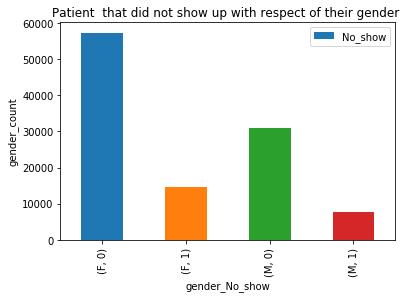

In [66]:
#exploring noshow with gender
df.groupby('gender').No_show.value_counts().plot(kind='bar')
plt.xlabel('gender_No_show')
plt.ylabel('gender_count')
plt.title('Patient  that did not show up with respect of their gender ')
plt.legend();

here i was able to show how gender affect  did_show(0) and noshow(1)by grouping its

In [67]:
df.sms_received[No_show].mean()


0.43837089475334917

In [68]:
df.sms_received[did_show].mean()

0.29133411935425357

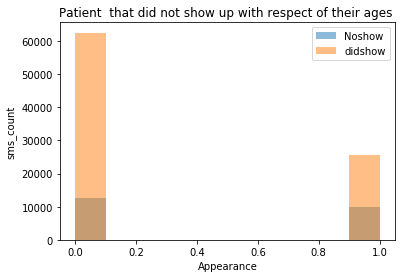

In [69]:
#exploring noshow with messages received 
df.sms_received[No_show].plot(kind = 'hist',alpha= 0.5, label = 'Noshow')
df.sms_received[did_show].plot(kind = 'hist', alpha= 0.5, label ='didshow')
plt.xlabel('Appearance')
plt.ylabel('sms_count')
plt.title('Patient  that did not show up with respect of their ages ')
plt.legend();

Messages was  another factors that influences  patient showing up or not whether it receives a messages through the number of sms received by patients.

In [70]:
#removing the outliers in age
df[df['age']<=0] = df['age'].mean()


In [71]:
df.age.describe()

count    110527.000000
mean         38.276780
std          22.104561
min           1.000000
25%          20.000000
50%          37.088874
75%          55.000000
max         115.000000
Name: age, dtype: float64

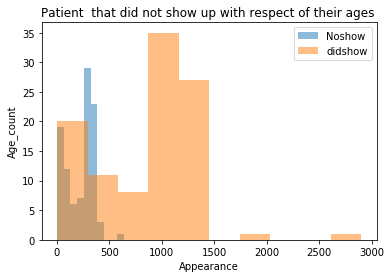

In [72]:
#how age is associated  with no_show medical appointment
df.age[No_show].value_counts().plot(kind = 'hist',alpha= 0.5, label = 'Noshow')
df.age[did_show].value_counts().plot(kind = 'hist', alpha= 0.5, label ='didshow')
plt.xlabel('Appearance')
plt.ylabel('Age_count')
plt.title('Patient  that did not show up with respect of their ages ')
plt.legend();

Patient with noshow or didshow can be associated  with age .where they able to leave their resident and how fit they are  which can be related to their ages.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
gender            110527 non-null object
schedule          110527 non-null object
AppointmentDay    110527 non-null object
age               110527 non-null float64
scholarship       110527 non-null float64
hypertension      110527 non-null float64
diabetes          110527 non-null float64
alcohol           110527 non-null float64
handicap          110527 non-null float64
sms_received      110527 non-null float64
No_show           110527 non-null float64
dtypes: float64(8), object(3)
memory usage: 9.3+ MB


In [74]:
#convert datatime
df["AppointmentDay"]= pd.to_datetime(df["AppointmentDay"])
df["schedule"]= pd.to_datetime(df["schedule"])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
gender            110527 non-null object
schedule          110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
age               110527 non-null float64
scholarship       110527 non-null float64
hypertension      110527 non-null float64
diabetes          110527 non-null float64
alcohol           110527 non-null float64
handicap          110527 non-null float64
sms_received      110527 non-null float64
No_show           110527 non-null float64
dtypes: datetime64[ns](2), float64(8), object(1)
memory usage: 9.3+ MB


In [76]:
df.head()

,gender,schedule,AppointmentDay,age,scholarship,hypertension,diabetes,alcohol,handicap,sms_received,No_show
0,F,2016-04-29 18:38:08,2016-04-29,62.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,M,2016-04-29 16:08:27,2016-04-29,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,2016-04-29 16:19:04,2016-04-29,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F,2016-04-29 17:29:31,2016-04-29,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,2016-04-29 16:07:23,2016-04-29,56.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


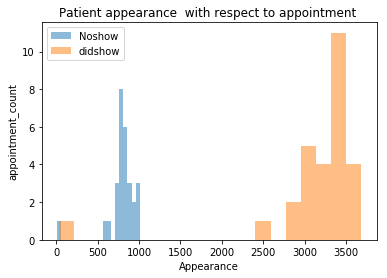

In [77]:
#how AppointmendtDay is associated  with no_show medical appointment
#df.AppointmentDay[No_show].value_counts().plot(kind = 'hist',alpha= 0.5, label = 'Noshow', bins = 20)
#df.AppointmentDay[did_show].value_counts().plot(kind = 'hist', alpha= 0.5, label ='didshow', bins = 20)
# creating a function
def func_name(par1,par2,par3):
    par1[par2].value_counts().plot(kind = 'hist',alpha = 0.5,label = par3,bins = 20 )
func_name(df.AppointmentDay,No_show, 'Noshow')
func_name(df.AppointmentDay,did_show, 'didshow')
plt.xlabel('Appearance')
plt.ylabel('appointment_count')
plt.title('Patient appearance  with respect to appointment ')
plt.legend();

This above show how patients registered  for  appointment whether they show or noshow

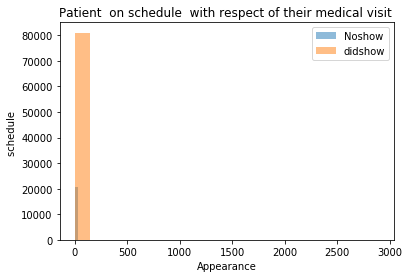

In [78]:
#how schedule is associated  with no_show medical appointment 
func_name(df.schedule,No_show, 'Noshow')
func_name(df.schedule,did_show, 'didshow')
plt.xlabel('Appearance')
plt.ylabel('schedule ')
plt.title('Patient  on schedule  with respect of their medical visit ')
plt.legend();

This above show how patients who came  for  there actual appointment.

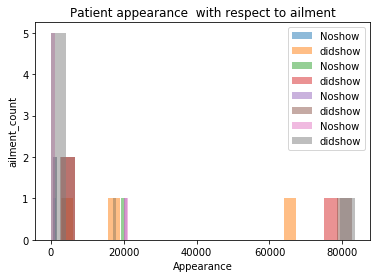

In [79]:
#deduction on No_show  medical appointment  with  relation to ailments
func_name(df.hypertension,No_show, 'Noshow')
func_name(df.hypertension,did_show, 'didshow')
func_name(df.diabetes,No_show, 'Noshow')
func_name(df.diabetes,did_show, 'didshow')
func_name(df.alcohol,No_show, 'Noshow')
func_name(df.alcohol,did_show, 'didshow')
func_name(df.handicap,No_show, 'Noshow')
func_name(df.handicap,did_show, 'didshow')
plt.xlabel('Appearance')
plt.ylabel('ailment_count')
plt.title('Patient appearance  with respect to ailment')
plt.legend();

based  on ailments. it can affect  whether patient showing up or not which patients had the higuest number of  ailments that didshow or noshow.

###  Conclusions
   In my findings, if I found that the dataset contains no duplications neither a null values,the No_show up column was replace with 1's and 0's for better exploration insteads of yes and no expressions. I drop some columns because i found them not useful ,They are various factor that influence if a patients will no_show or didshow for their scheduled medical appointments.
   The gender is one of the factor observed if it can affect the schedule appointment,as shown in in[12] more female patients did show for their appointment as compared the male patents,same can be conclude  with female No_show patients.More patients didshow based on sms_count as compared to no_show but the average of  no_show patients is more to did show patients
    Another factor I used in exploration was age. the most common age brackets for didshow  for appointment is almost 35years old while the age brackets for noshow is almost 30years old. patients that  makeit to their appointments day as noshow patient is more that did show patients . patienTs  schedule in term of noshow was higher than  didshow .
   finally  based on  patients ailments grouping, handicap has the highest number  of didshow patients follow by alcohol, hypetension and diabetes in that order while  the handicap had the highest number of Noshow patient
## limitations:
 To some extent the datasets was sufficient but just had a little problem with some columns in the datasets.The age column that had an outliers was replace  with the average mean of the ages for better exploration. the neigbourhood  and the patientid column was drop because it's was irrelevant for my exploration. 

In [80]:
df.describe()

,age,scholarship,hypertension,diabetes,alcohol,handicap,sms_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806,1.384047
std,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885,6.506818
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


### reference 
stack overflow,
project walkthrough


In [81]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0